In [63]:
import datetime

import pandas as pd
import numpy as np
import sklearn

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [64]:
#read in
names = ['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name', 'Health_Status', 'Unhealthy_Days']    

demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
leading = pd.read_csv("./data/LEADINGCAUSESOFDEATH.csv", usecols=['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality', 'IM_Postneonatal', 'IM_Neonatal'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Carbon_Monoxide_Ind', 'Nitrogen_Dioxide_Ind', 'Sulfur_Dioxide_Ind','Ozone_Ind', 'Particulate_Matter_Ind','Lead_Ind'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])

summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 2 columns):
Health_Status     3141 non-null float64
Unhealthy_Days    3141 non-null float64
dtypes: float64(2)
memory usage: 49.2 KB


In [65]:
#merge
full = pd.concat([demographics, summary,leading, measure, vunerable,risk], axis=1, join="inner")
selected = full.copy()
selected.drop('CHSI_County_Name', axis=1, inplace=True)
selected.drop('CHSI_State_Name', axis=1, inplace=True)

In [66]:
selected.info()
selected.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 25 columns):
State_FIPS_Code           3141 non-null int64
County_FIPS_Code          3141 non-null int64
Health_Status             3141 non-null float64
Unhealthy_Days            3141 non-null float64
A_Wh_BirthDef             3141 non-null int64
A_Bl_BirthDef             3141 non-null int64
A_Ot_BirthDef             3141 non-null int64
A_Hi_BirthDef             3141 non-null int64
Premature                 3141 non-null float64
Under_18                  3141 non-null float64
Over_40                   3141 non-null float64
Infant_Mortality          3141 non-null float64
IM_Neonatal               3141 non-null float64
IM_Postneonatal           3141 non-null float64
Toxic_Chem                3141 non-null int64
Carbon_Monoxide_Ind       3141 non-null int64
Nitrogen_Dioxide_Ind      3141 non-null int64
Sulfur_Dioxide_Ind        3141 non-null int64
Ozone_Ind                 3141 non-null int64
Par

,State_FIPS_Code,County_FIPS_Code,Health_Status,Unhealthy_Days,A_Wh_BirthDef,A_Bl_BirthDef,A_Ot_BirthDef,A_Hi_BirthDef,Premature,Under_18,...,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,...,3141.000000,3141.0,3141.0,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,30.304680,103.716651,-221.227889,-187.741897,-771.249602,-1027.079911,-1098.359758,-1058.209806,5.445782,-23.668609,...,1.000318,1.0,1.0,1.066221,1.005412,1.000318,-307.284241,-559.874849,-292.487902,-142.517765
std,15.134423,107.999484,460.837341,423.142860,520.738729,297.163582,122.352747,240.778913,89.329406,178.062926,...,0.017843,0.0,0.0,0.248708,0.073381,0.017843,516.246132,568.622294,508.390227,381.651636
min,1.000000,1.000000,-1111.100000,-1111.100000,-2222.000000,-2222.000000,-2222.000000,-2222.000000,-2222.200000,-2222.200000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,-1111.100000,-1111.100000,-1111.100000,-1111.100000
25%,18.000000,35.000000,8.900000,4.500000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,10.200000,2.900000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,-1111.100000,-1111.100000,-1111.100000,5.000000
50%,29.000000,79.000000,14.600000,5.700000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,11.700000,4.300000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,21.700000,-1111.100000,20.300000,7.000000
75%,45.000000,133.000000,19.400000,6.600000,17.000000,-1111.000000,-1111.000000,-1111.000000,13.200000,6.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,25.800000,26.100000,25.100000,9.100000
max,56.000000,840.000000,47.700000,12.600000,57.000000,38.000000,47.000000,52.000000,23.500000,14.500000,...,2.000000,1.0,1.0,2.000000,2.000000,2.000000,42.600000,47.100000,46.200000,20.800000


In [67]:
target = pd.DataFrame(selected, columns=["A_Wh_BirthDef"])
X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2512, 25)
(2512, 1)
(629, 25)
(629, 1)


In [68]:
kn = KNeighborsRegressor(n_neighbors=3)
#lm = linear_model.LinearRegression()
model = kn.fit(X_train, y_train)
predictions = kn.predict(X_test)
print(predictions.shape)

(629, 1)


Text(0, 0.5, 'Predictions')

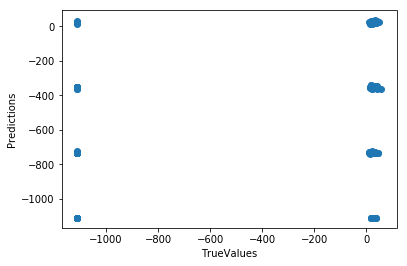

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [70]:
model.score(X_test, y_test)

0.37726033957647753

In [71]:
print(X_test.shape)

(629, 25)
